In [10]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [30]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import matplotlib.pyplot as plt
import seaborn as sns
import hddm
import numpy as np
from sys import platform
import os
# print(hddm.__version__)
from textwrap import wrap

%matplotlib inline
# plt.rcParams['figure.figsize'] = 30, 10
sns.set_context("notebook", font_scale=2)

In [31]:
if platform == 'linux2':
    home = '/lab_data/coaxlab/Projects/dynamic_decision_policy_reconfiguration/'
elif platform == 'darwin':
    home = '/Users/i_67981492/dynamic_decision_policy_reconfiguration/'

print(platform, home)

write_dir = os.path.join(home, 'analysis_revision/evoked_response_reg_models/'); print(write_dir)

os.path.isdir(write_dir)

all_obs_data = hddm.load_csv(os.path.join(home, 'aggregated_data/loki_0/av_est_fix.csv'))
all_obs_data_pared = all_obs_data.loc[(all_obs_data.shifted_epoch_trial <= 3) &
                                      (all_obs_data.shifted_epoch_trial >=-1)]

all_obs_data_pared.groupby('condition').p_optimal.unique()

all_obs_data_pared.groupby('condition').lambda_val.unique()


all_obs_data_pared.columns = all_obs_data_pared.columns.str.strip()
all_obs_data_pared.head()


all_obs_data_pared["shifted_epoch_trial"] = all_obs_data_pared["shifted_epoch_trial"].astype('category')


('linux2', '/lab_data/coaxlab/Projects/dynamic_decision_policy_reconfiguration/')
/lab_data/coaxlab/Projects/dynamic_decision_policy_reconfiguration/analysis_revision/evoked_response_reg_models/


In [32]:
all_obs_data_pared.rename(index=str, columns={"p_id_accuracy": "response",
                                                        "subj_id": "subj_idx"}, inplace=True)


included_acc_params_input = ['a', 'v', 't', 'z']


all_obs_data_pared['cpp_shifted'] = all_obs_data_pared.groupby(['subj_idx', 'condition']).cpp.apply(lambda x: x.shift(1))
all_obs_data_pared['ideal_B_shifted'] = all_obs_data_pared.groupby(['subj_idx', 'condition']).ideal_B.apply(lambda x: x.shift(1))

In [33]:
# all_obs_data_pared = all_obs_data_pared[['response', 'rt', 'experiment',
#                                                    'cpp_shifted', 'ideal_B_shifted', 
#                              'subj_idx', 'shifted_epoch_trial']].dropna()
all_obs_data_pared = all_obs_data_pared[['response', 'rt', 'experiment',
                                                   'cpp_shifted', 'ideal_B_shifted', 
                             'subj_idx', 'shifted_epoch_trial']].dropna()


In [34]:
all_obs_data_pared.dropna(inplace=True) #need to drop nas for HDDMRegressor

In [35]:
all_obs_data_pared.head()

,response,rt,experiment,cpp_shifted,ideal_B_shifted,subj_idx,shifted_epoch_trial
1,0,0.681410,conflict,0.099471,0.000000,761,1
2,1,0.767118,conflict,0.035079,-1.241007,761,2
3,0,0.507209,conflict,0.023075,-0.595781,761,3
9,0,0.519362,conflict,0.019881,-0.306135,761,-1
10,1,0.258148,conflict,0.033748,0.352910,761,0


In [36]:
a_cpp_v_B_all_subs = pd.read_csv(os.path.join(write_dir, 'cpp_shifted~a & ideal_B_shifted~v_mockup_data_subset_reg_traces.csv'))

In [37]:
a_cpp_v_B_all_subs.head()

,a_Intercept,a_Intercept_std,a_cpp_shifted,t,t_std,v_Intercept,v_Intercept_std,v_ideal_B_shifted,z_std,z_trans,mcmc_iteration
0,0.953640,0.154829,0.010382,0.141712,0.041899,0.048523,0.274760,0.136048,0.050575,-0.007063,0
1,0.923351,0.103125,0.012748,0.145705,0.039820,0.070660,0.281436,0.146528,0.068565,0.027658,1
2,0.969124,0.156584,0.003580,0.138602,0.050389,-0.125071,0.330371,0.156825,0.072629,0.030474,2
3,0.945239,0.130973,-0.018754,0.136551,0.035980,-0.075572,0.364966,0.126822,0.078278,0.002149,3
4,0.972956,0.147661,-0.005258,0.131600,0.030847,0.037050,0.335007,0.134200,0.101071,-0.020333,4


# Group-level CP-evoked $\hat{\beta}$ (trials -1:3)

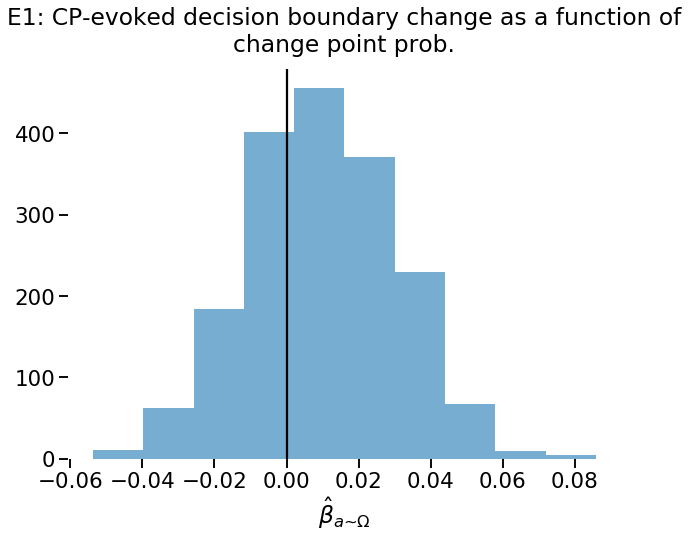

In [38]:
plt.figure(figsize=(10,8))
sns.set_context("talk", font_scale=1.3)
plt.hist(a_cpp_v_B_all_subs['a_cpp_shifted'], alpha=0.6)
plt.xlabel(r'$\hat{\beta}_{a\textasciitilde\Omega}$')
plt.axvline(x=0, color='black')
sns.despine(bottom=True, left=True)
plt.title("\n".join(wrap("E1: CP-evoked decision boundary change as a function of change point prob.", 60)), y=1.03)
plt.tight_layout()


plt.savefig(os.path.join(write_dir, 'CP_evoked_boundary_beta_posterior.pdf'), bbox_inches='tight')

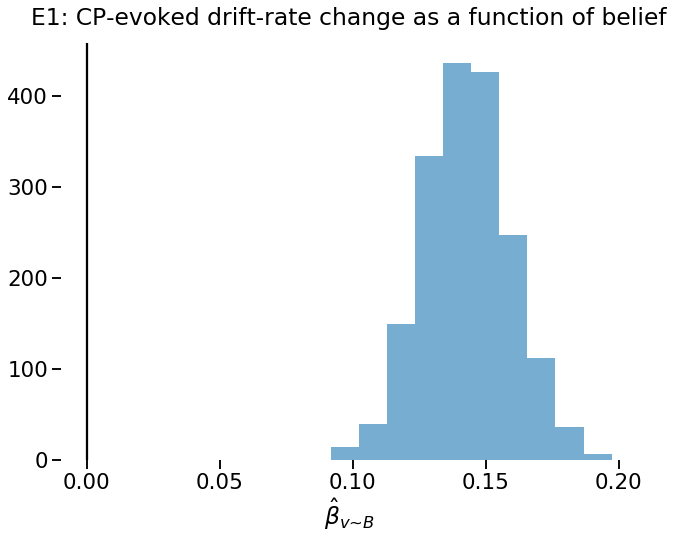

In [47]:
plt.figure(figsize=(10,8))
sns.set_context("talk", font_scale=1.3)
plt.hist(a_cpp_v_B_all_subs['v_ideal_B_shifted'], alpha=0.6)
plt.xlabel(r'$\hat{\beta}_{v \textasciitilde B}$')
plt.axvline(x=0, color='black')
sns.despine(bottom=True, left=True)
plt.title("\n".join(wrap("E1: CP-evoked drift-rate change as a function of belief", 60)), y=1.03)

plt.tight_layout()
plt.savefig(os.path.join(write_dir, 'CP_evoked_drift_beta_posterior.pdf'), bbox_inches='tight')

### Calculating an estimate of trialwise decision parameters using group-level $\hat{\beta}$

In [41]:
grp_a_estimate = a_cpp_v_B_all_subs['a_Intercept'].mean() + a_cpp_v_B_all_subs['a_cpp_shifted'].mean() * all_obs_data_pared.cpp_shifted.values
grp_v_estimate = a_cpp_v_B_all_subs['v_Intercept'].mean() + a_cpp_v_B_all_subs['v_ideal_B_shifted'].mean() * all_obs_data_pared.ideal_B_shifted.values

In [42]:
all_obs_data_pared['grp_a_estimate'] = grp_a_estimate
all_obs_data_pared['grp_v_estimate'] = grp_v_estimate

### Calculating an estimate of trialwise decision parameters for each subject using sub-level $\hat{\beta_0}$ & group-level $\hat{\beta}$

In [45]:
a_cpp_v_B_all_subs.head()

,a_Intercept,a_Intercept_std,a_cpp_shifted,t,t_std,v_Intercept,v_Intercept_std,v_ideal_B_shifted,z_std,z_trans,mcmc_iteration
0,0.953640,0.154829,0.010382,0.141712,0.041899,0.048523,0.274760,0.136048,0.050575,-0.007063,0
1,0.923351,0.103125,0.012748,0.145705,0.039820,0.070660,0.281436,0.146528,0.068565,0.027658,1
2,0.969124,0.156584,0.003580,0.138602,0.050389,-0.125071,0.330371,0.156825,0.072629,0.030474,2
3,0.945239,0.130973,-0.018754,0.136551,0.035980,-0.075572,0.364966,0.126822,0.078278,0.002149,3
4,0.972956,0.147661,-0.005258,0.131600,0.030847,0.037050,0.335007,0.134200,0.101071,-0.020333,4


In [39]:
all_obs_data_pared.head()

,response,rt,reward_code,subj_idx,condition,ideal_B,cpp,shifted_epoch_trial,cpp_shifted,ideal_B_shifted,grp_a_estimate,grp_v_estimate,sub_a_estimate,sub_v_estimate
1,1.0,0.500100,0,786,6510,-1.562444,0.319389,2.0,0.076938,-2.160816,1.419050,0.034884,1.353472,0.014903
2,1.0,0.534169,0,786,6510,0.125126,0.300755,3.0,0.319389,-1.562444,1.422023,0.050702,1.356445,0.030721
3,1.0,0.630004,0,786,6510,2.206471,0.077553,-1.0,0.300755,0.125126,1.421795,0.095313,1.356217,0.075332
4,1.0,0.596382,0,786,6510,-2.664951,0.463273,0.0,0.077553,2.206471,1.419058,0.150334,1.353480,0.130352
5,1.0,0.530803,0,786,6510,-0.102781,0.075790,1.0,0.463273,-2.664951,1.423788,0.021557,1.358210,0.001576


# Group-level CP-evoked responses 

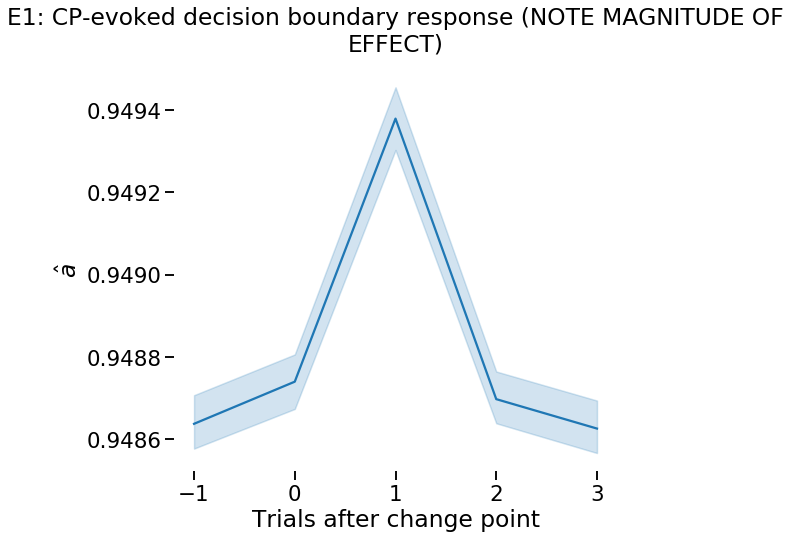

In [48]:
plt.figure(figsize=(10,8))
sns.set_context("talk", font_scale=1.3)

sns.lineplot(x='shifted_epoch_trial', y='grp_a_estimate', data=all_obs_data_pared)
plt.xlabel('Trials after change point')
plt.ylabel(r'$\hat{a}$')
plt.title("\n".join(wrap("E1: CP-evoked decision boundary response (NOTE MAGNITUDE OF EFFECT)", 60)), y=1.03)

sns.despine(bottom=True, left=True)
plt.tight_layout()
plt.savefig(os.path.join(write_dir, 'CP_evoked_boundary_trialwise_estimate.pdf'), bbox_inches='tight')

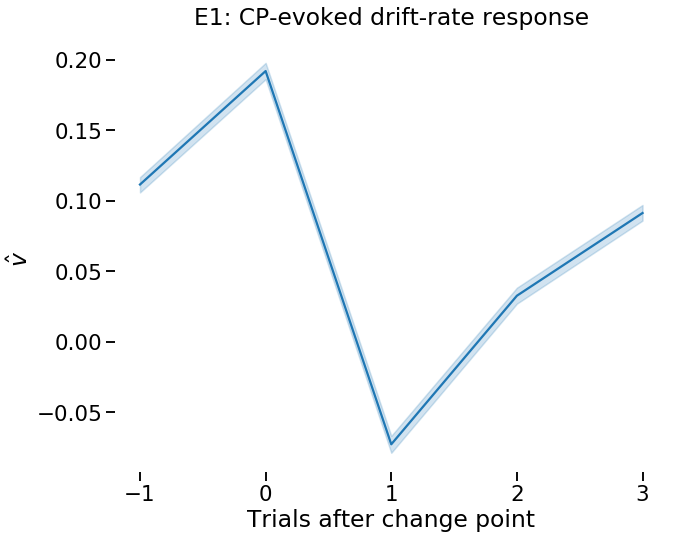

In [49]:
plt.figure(figsize=(10,8))
sns.set_context("talk", font_scale=1.3)

plt.title("\n".join(wrap("E1: CP-evoked drift-rate response", 60)), y=1.03)

sns.lineplot(x='shifted_epoch_trial', y='grp_v_estimate', data=all_obs_data_pared)
plt.xlabel('Trials after change point')
plt.ylabel(r'$\hat{v}$')

sns.despine(bottom=True, left=True)
plt.tight_layout()
plt.savefig(os.path.join(write_dir, 'CP_evoked_drift_trialwise_estimate.pdf'), bbox_inches='tight')